# Face Generator
The training of the network for the neural face editor project

In [0]:
from PIL import Image, ImageOps
from google.colab import drive

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import os
import cv2

## Drive & Data Setup
Connecting to my drive and downloading the necessary data

In [1]:
drive.mount('/content/gdrive')

!wget https://raw.githubusercontent.com/parulnith/Face-Detection-in-Python-using-OpenCV/master/data/haarcascades/haarcascade_frontalface_default.xml > haarcascade_frontalface_default.xml

data_path = './gdrive/My Drive/FaceGenerator/'
unix_safe_data_path = './gdrive/My\ Drive/FaceGenerator/wiki_crop.tar'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
--2019-05-02 05:51:00--  https://raw.githubusercontent.com/parulnith/Face-Detection-in-Python-using-OpenCV/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 963441 (941K) [text/

In [0]:
!tar -xf {unix_safe_data_path}

### Loading in the images
Loading the images and extracting only those that fulfill two criteria:

- Have a frontal face
- Have high enough resolution

Images are resized to 256 x 256 pixels

In [0]:
def get_image(path):
  image = cv2.imread(path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  
  pixels = np.prod(image.shape)
  size = image.shape
  image = cv2.resize(image, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)

  gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

  haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml.1')
  faces_rects = haar_cascade_face.detectMultiScale(gray_image, scaleFactor = 1.1, minNeighbors = 5)

  if len(faces_rects) and pixels / np.prod(image.shape) > 0.3:
    return image

In [0]:
from tqdm import tqdm
X = []
for idx in range(10, 30):
  print('\n------')
  print('[idx]', idx)
  print('[images]', len(X))
  print('------')
  files = os.listdir(f'/content/wiki_crop/{idx}/')
  for i in tqdm(range(0, 500)):
    im = get_image(f'/content/wiki_crop/{idx}/{files[i]}')
    if im is not None:
      X.append(im)
    
X = np.array(X)
np.save(f'{data_path}/images', X)

  0%|          | 0/500 [00:00<?, ?it/s]


------
[idx] 10
[images] 0
------


  0%|          | 2/500 [00:00<00:29, 16.74it/s]


------
[idx] 11
[images] 235
------


  1%|          | 3/500 [00:00<00:20, 24.53it/s]


------
[idx] 12
[images] 469
------


  1%|          | 3/500 [00:00<00:20, 24.20it/s]


------
[idx] 13
[images] 697
------


  0%|          | 2/500 [00:00<00:29, 16.96it/s]


------
[idx] 14
[images] 922
------


  0%|          | 2/500 [00:00<00:25, 19.32it/s]


------
[idx] 15
[images] 1144
------


  0%|          | 2/500 [00:00<00:27, 18.41it/s]


------
[idx] 16
[images] 1375
------


  0%|          | 2/500 [00:00<00:27, 17.99it/s]


------
[idx] 17
[images] 1589
------


  0%|          | 2/500 [00:00<00:27, 17.89it/s]


------
[idx] 18
[images] 1828
------


  0%|          | 2/500 [00:00<00:25, 19.73it/s]


------
[idx] 19
[images] 2061
------


  0%|          | 2/500 [00:00<00:33, 15.06it/s]


------
[idx] 20
[images] 2273
------


  0%|          | 2/500 [00:00<00:30, 16.39it/s]


------
[idx] 21
[images] 2489
------


  0%|          | 2/500 [00:00<00:28, 17.73it/s]


------
[idx] 22
[images] 2722
------


  1%|          | 3/500 [00:00<00:20, 23.94it/s]


------
[idx] 23
[images] 2944
------


  1%|          | 3/500 [00:00<00:22, 22.24it/s]


------
[idx] 24
[images] 3171
------


  1%|          | 3/500 [00:00<00:18, 27.51it/s]


------
[idx] 25
[images] 3400
------


  1%|          | 3/500 [00:00<00:21, 23.25it/s]


------
[idx] 26
[images] 3623
------


  1%|          | 4/500 [00:00<00:17, 28.77it/s]


------
[idx] 27
[images] 3865
------


  1%|          | 3/500 [00:00<00:22, 21.85it/s]


------
[idx] 28
[images] 4081
------


  1%|          | 3/500 [00:00<00:23, 21.22it/s]


------
[idx] 29
[images] 4312
------


100%|██████████| 500/500 [00:22<00:00, 22.09it/s]


## Autoencoder
The autoencoder definition

![Architecture](https://res.cloudinary.com/ppierzc/image/upload/v1557048911/architecture_blh3p5.png)



In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, Dense, Flatten, BatchNormalization, Activation, Reshape, UpSampling2D, Conv2DTranspose
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import RMSprop

class CAE (object):
  def __init__(self, input_shape=(256, 256, 3), filters=[64, 128, 512, 100]):
    self.encoder = Sequential()
    self.decoder = Sequential()

    if input_shape[0] % 8 == 0:
        pad3 = 'same'
    else:
        pad3 = 'valid'

    self.encoder.add(Conv2D(filters[0], 3, strides=2, padding=pad3, activation='relu', name='conv1', input_shape=input_shape))
    self.encoder.add(Conv2D(filters[1], 3, strides=2, padding=pad3, activation='relu', name='conv2'))
    self.encoder.add(Conv2D(filters[2], 2, strides=2, padding=pad3, activation='relu', name='conv3'))

    self.encoder.add(Flatten(name='flatten'))
    self.encoder.add(Dense(units=filters[3], name='embedding'))

    self.decoder.add(Dense(units=filters[2]*int(input_shape[0]/8)*int(input_shape[0]/8), activation='relu', name='FC', input_shape=self.encoder.output_shape))
    self.decoder.add(Reshape((int(input_shape[0]/8), int(input_shape[0]/8), filters[2]), name='reshape'))

    self.decoder.add(Conv2DTranspose(filters[1], 2, strides=2, padding=pad3, activation='relu', name='deconv3'))
    self.decoder.add(Conv2DTranspose(filters[0], 3, strides=2, padding=pad3, activation='relu', name='deconv2'))
    self.decoder.add(Conv2DTranspose(input_shape[2], 3, strides=2, padding=pad3, name='deconv1'))
      
  def compile(self):
    self.model = Sequential()
    self.model.add(self.encoder)
    self.model.add(self.decoder)
    
    self.model.compile(optimizer='adam', loss='mse')
    
    return self
    
  def fit(self, x, batch_size=64, epochs=100, verbose=0):
    return self.model.fit(
      x,
      x,
      batch_size=batch_size,
      epochs=epochs,
      verbose=verbose
  )
  
CAE().encoder.summary()
CAE().decoder.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2 (Conv2D)               (None, 64, 64, 128)       73856     
_________________________________________________________________
conv3 (Conv2D)               (None, 32, 32, 512)       262656    
_________________________________________________________________
flatten (Flatten)            (None, 524288)            0         
_________________________________________________________________
embedding (Dense)            (None, 100)               52428900  
Total params: 52,767,204
Trainable params: 52,767,204
Non-trainable params: 0
_________________________________________________________________
__________________________________________________________

In [5]:
cae = CAE()
cae.compile()

### Training
Train for about 500 epochs.

About because it is trianed in sets of 5 epochs. Every 5 epochs the current result is displayed. This allows to stop when the result is satisfactory.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


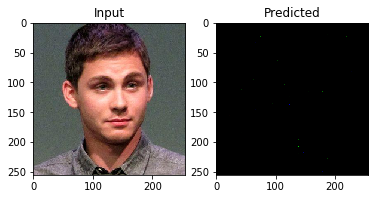

Instructions for updating:
Use tf.cast instead.


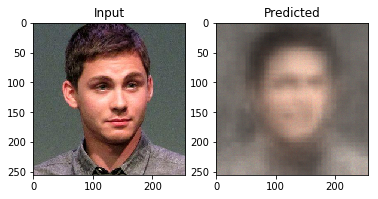

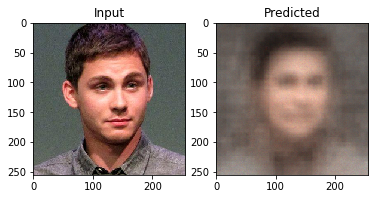

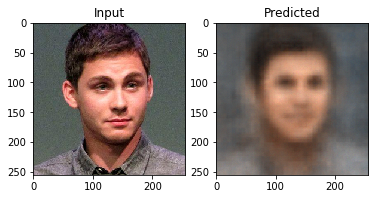

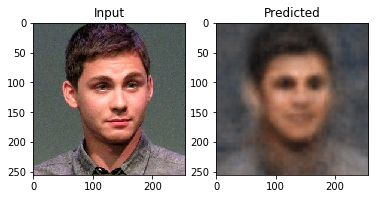

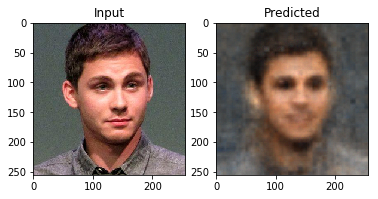

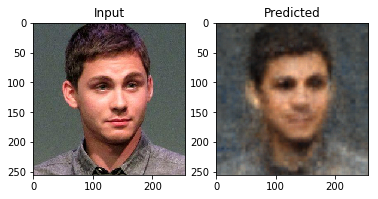

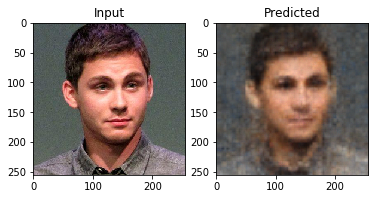

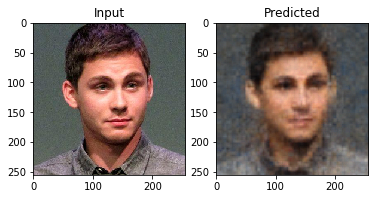

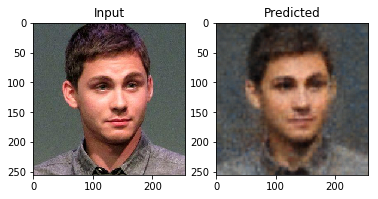

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


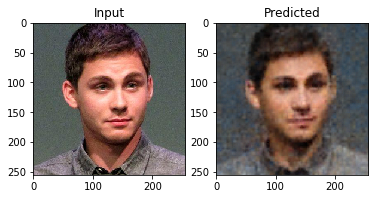

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


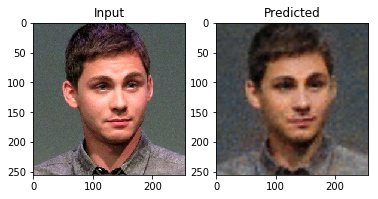

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


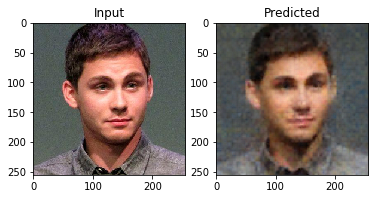

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


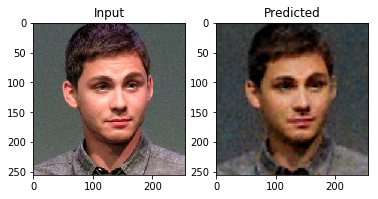

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


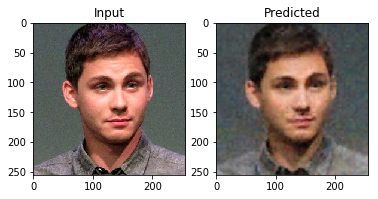

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


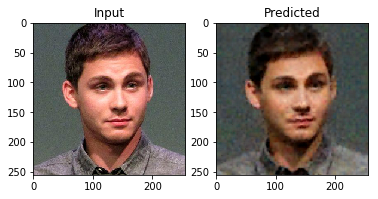

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


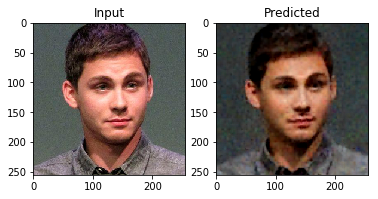

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


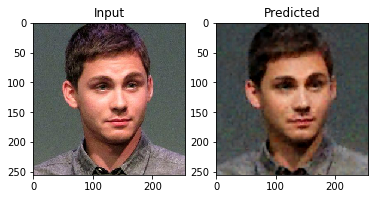

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


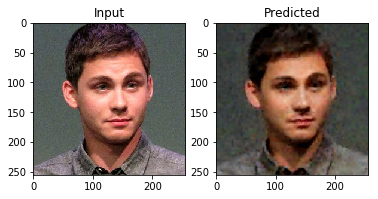

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


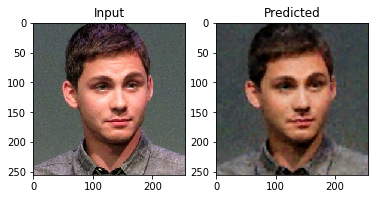

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


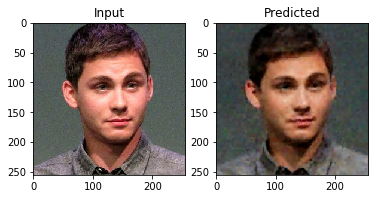

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


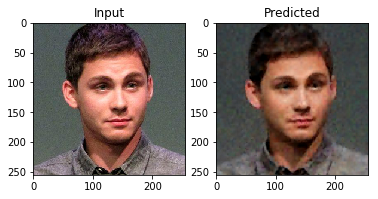

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


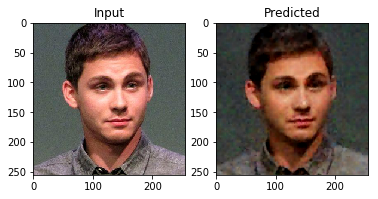

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


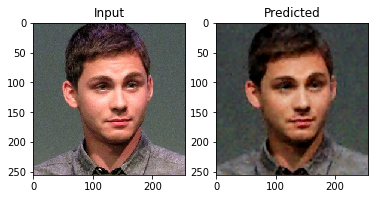

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


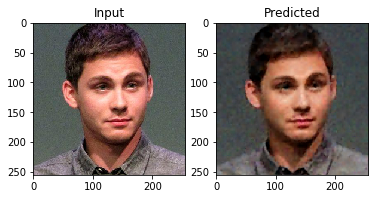

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


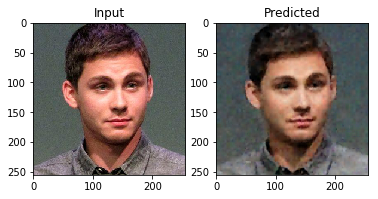

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


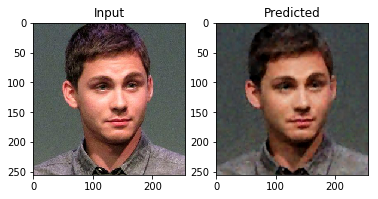

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


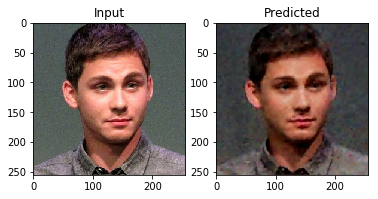

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


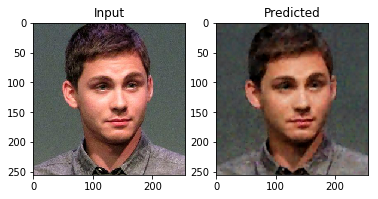

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


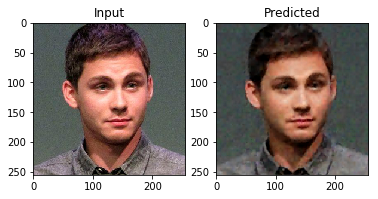

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


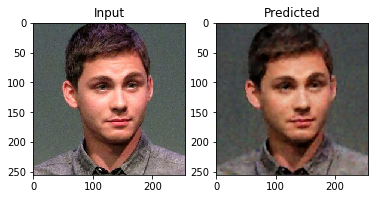

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


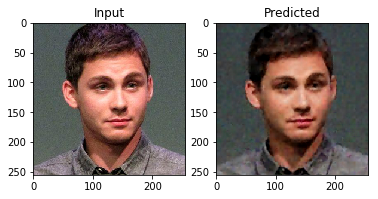

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


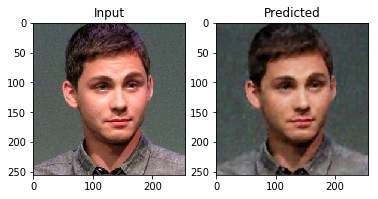

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


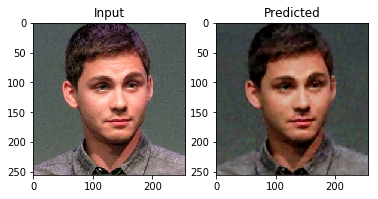

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


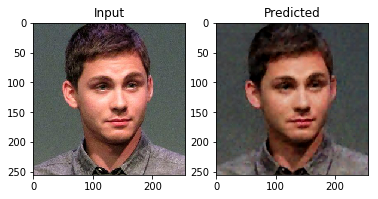

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


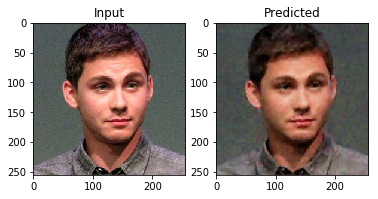

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


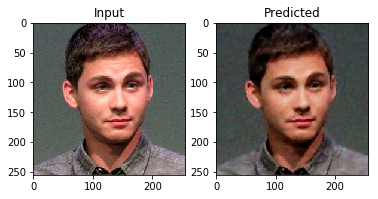

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


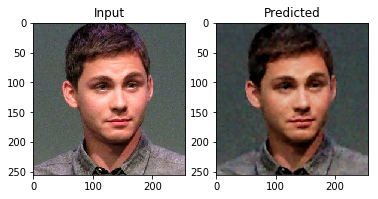

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


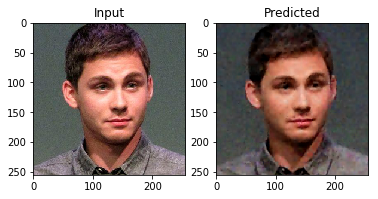

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


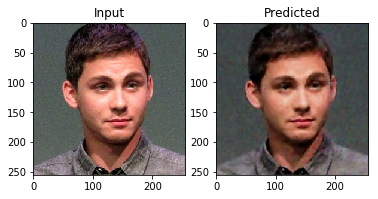

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


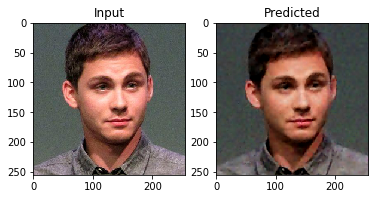

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


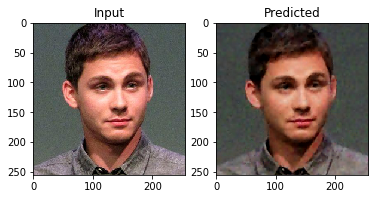

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


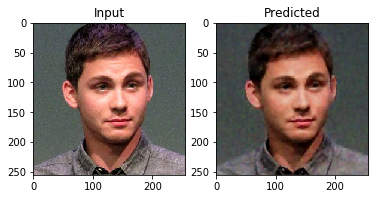

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


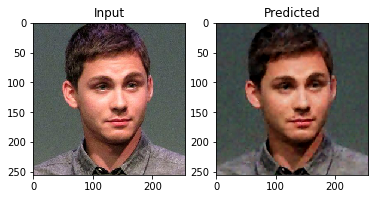

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


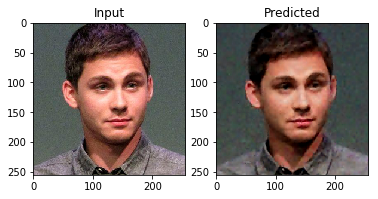

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


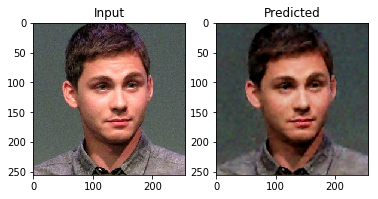

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


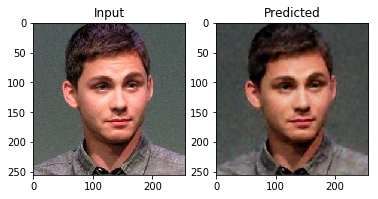

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


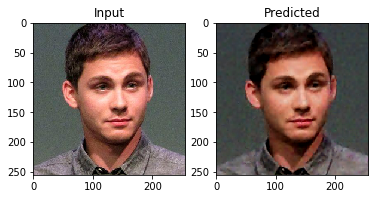

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


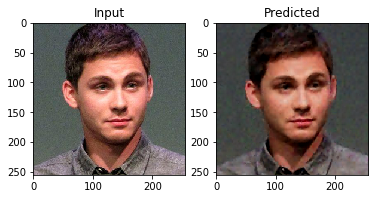

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


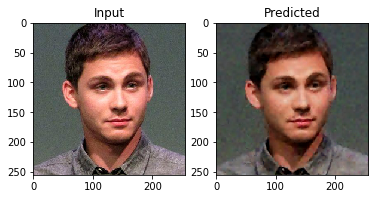

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


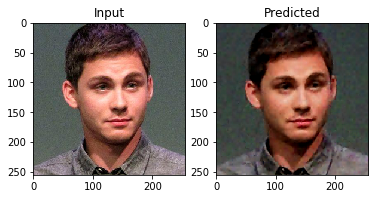

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


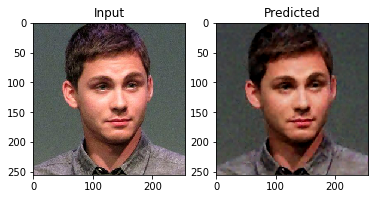

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


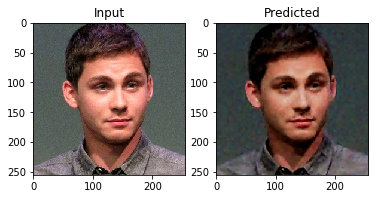

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


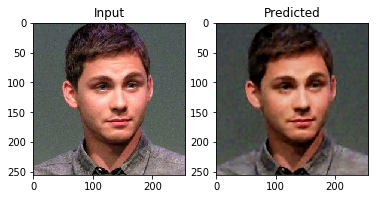

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


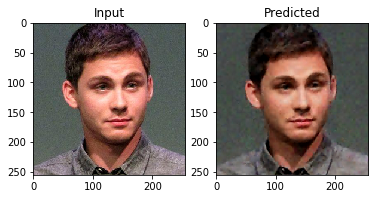

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


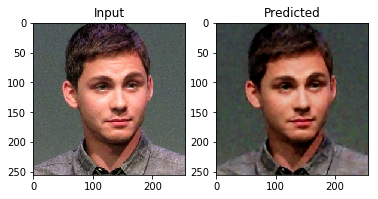

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


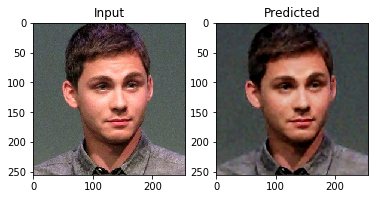

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


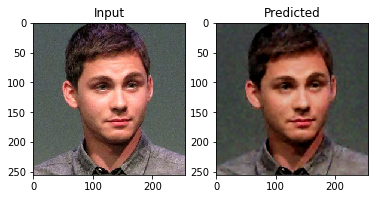

KeyboardInterrupt: ignored

In [6]:
for i in range(1, 100):
  plt.figure()
  
  plt.subplot(1, 2, 1)
  plt.imshow(X[7])
  plt.title('Input')
  
  plt.subplot(1, 2, 2)
  predicted = cae.model.predict(np.array([X[7]]))
  predicted += np.min(predicted)
  predicted /= np.max(predicted)
  plt.imshow(predicted[0])
  plt.title('Predicted')
  
  plt.savefig(f'{data_path}/training/{i}.png')
  
  plt.show()

  loss = cae.fit(X, epochs=5, verbose=0, batch_size=64)

### Check
Display encodings for other examples

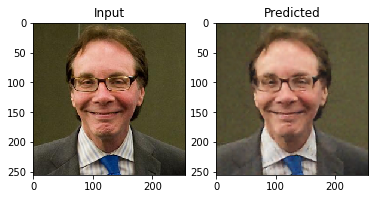

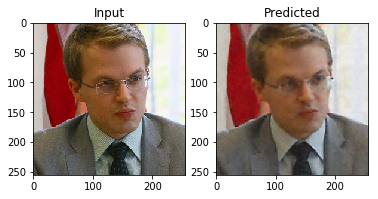

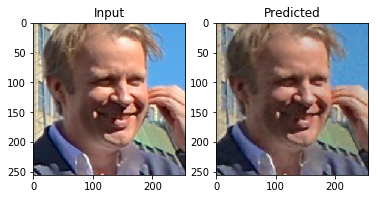

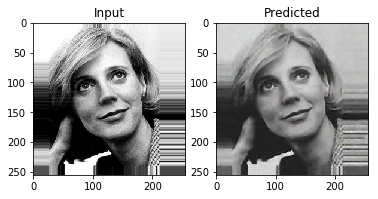

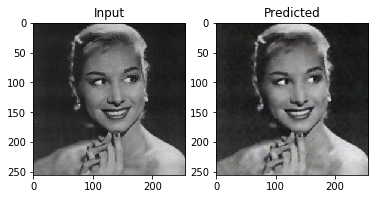

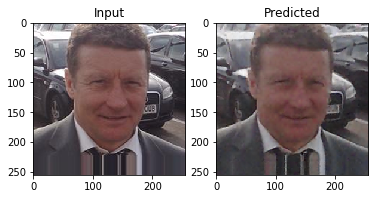

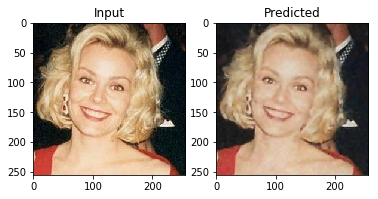

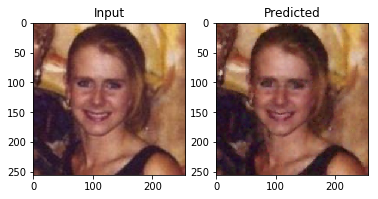

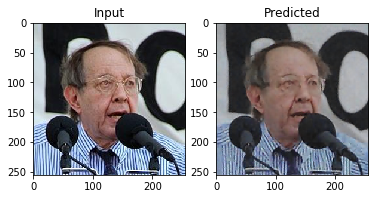

In [13]:
for i in range(10, 100, 10):
  plt.figure()

  plt.subplot(1, 2, 1)
  plt.imshow(X[i])
  plt.title('Input')

  plt.subplot(1, 2, 2)
  predicted = cae.model.predict(np.array([X[i]]))
  predicted -= np.min(predicted)
  predicted /= np.max(predicted)
  plt.imshow(predicted[0])
  plt.title('Predicted')

  plt.show()

## Principle Component Analysis (PCA)

Check how PCA transfoms the latent vector and what can be extracted.

[-3.88152985e-04 -5.03224655e-05  4.16832008e-05 -1.81776868e-05
 -6.86310013e-05  1.03134385e-04 -9.53305280e-05  1.52265799e-04
 -2.72135192e-04 -6.04379566e-05  1.32692003e-04 -3.48254689e-05
 -1.26485565e-05  2.09117206e-04  2.95244809e-06 -5.28186283e-05
 -4.59474759e-05  9.54848583e-05 -1.76710728e-05 -3.37719830e-05
 -7.66294543e-05 -4.67375903e-05  4.30990331e-05 -2.37135264e-05
 -3.66237764e-05  3.48741160e-05 -2.52669179e-05 -9.25105996e-05
 -2.94037000e-05 -6.81193560e-05]
[1337.1035   790.1847   675.5594   622.8902   612.37695  593.6882
  543.3878   517.6376   511.71185  487.12433  482.54938  474.7597
  468.24277  462.06802  450.1628   442.5355   425.51273  413.4153
  412.4026   404.39734  393.67355  383.86853  382.58405  381.32602
  377.27762  373.78317  373.1427   369.94415  366.49557  361.58035]
[ 0.69445062  0.2235115  -0.69250129 -0.89020005 -1.25776306 -0.96941301
 -0.53067012  0.60595826 -0.02699161 -2.71664928 -0.39322658  0.76321624
  0.67465778 -0.52835353 -1.2998

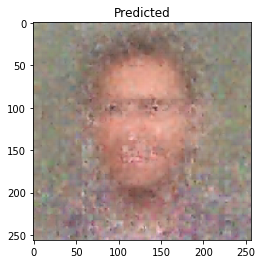

In [20]:
from sklearn.decomposition import PCA

encoded = cae.encoder.predict(X)
pca = PCA(30)
pca.fit(encoded)

transformed = pca.transform(encoded)
mean_transformed = np.mean(transformed, axis=0)
std_transformed = np.std(transformed, axis=0)
print(mean_transformed)
print(std_transformed)


mean_transformed = np.random.normal(loc=0, scale=1, size=30)
print(mean_transformed)
mean_encod = pca.inverse_transform(mean_transformed)

mean_encod = np.reshape(mean_encod, (1, 100))
mean_image = cae.decoder.predict(np.array([mean_encod]))[0]

mean_image /= np.max(mean_image)
plt.imshow(mean_image)
plt.title('Predicted')
plt.show()

In [0]:
pca = PCA(100)
encoded = cae.encoder.predict(X)
pca.fit(encoded)

encoded_1 = cae.encoder.predict(np.array([X[i1]]))
character_1 = pca.transform(encoded_1)

inv = pca.inverse_transform(character_1)
inv = np.reshape(inv, (1, 100))
inv = cae.decoder.predict(np.array([inv]))[0]

inv -= np.min(inv)
inv /= np.max(inv)

inv1 = inv

plt.subplot(1, 3, 1)
plt.imshow(inv)
plt.title('Predicted')

character_2 = character_1[:]
# character_2[0][0] = -1000 # Background Lightness
# character_2[0][1] = 1000 # Tshirt Lightness
# character_2[0][2] = 0 # Redness
# character_2[0][3] = -1000 # Vertical lightning
# character_2[0][4] = 1000 # Vertical lightning
# character_2[0][5] = 3000 # Horizontal lightning
# character_2[0][6] = -3000 # Background lightning
# character_2[0][7] = 3000 # Vertical lightning
# character_2[0][8] = -2000 # ?
# character_2[0][9] = 3000 # ?
character_2[0][10] = 4000 # gender
# character_2[0][11] = -3000 # vertical lightning
# character_2[0][12] = -2500 # ?
# character_2[0][13] = 0 # ?
# character_2[0][14] = -2000 # ?
# character_2[0][15] = -2000 # ?
# character_2[0][16] = -2000 # ?
# character_2[0][17] = -1000 # ?

inv = pca.inverse_transform(character_2)
inv = np.reshape(inv, (1, 100))
inv = cae.decoder.predict(np.array([inv]))[0]

inv -= np.min(inv)
inv /= np.max(inv)

inv2 = inv

plt.subplot(1, 3, 2)
plt.imshow(inv)
plt.title('Predicted Changed')

plt.subplot(1, 3, 3)
plt.imshow(inv2 - inv1)
plt.title('Difference')

plt.show()

## Saving model

In [0]:
cae.decoder.save(f'{data_path}decoder.h5')
cae.encoder.save(f'{data_path}encoder.h5')
cae.model.save(f'{data_path}model.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


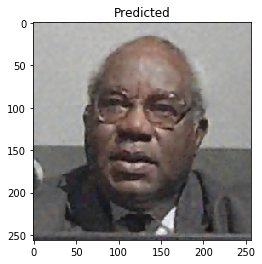

In [35]:
from keras.models import load_model

dec = load_model(f'{data_path}decoder.h5')
enc = load_model(f'{data_path}encoder.h5')

# X = np.zeros((1, 1, 100))
encoded = enc.predict(X[:1])
mean_image = dec.predict(np.array([encoded]))[0]

mean_image /= np.max(mean_image)
plt.imshow(mean_image)
plt.title('Predicted')
plt.show()

## Saving encoded examples to json

In [0]:
import json

encoded = enc.predict(X)
with open(f'{data_path}endcoded.json', 'w+') as f:
  js = json.dumps({'X': encoded.tolist()})
  f.write(js)